In [2]:
import matplotlib.pyplot as plt

import math as m
import itertools as it
import functools as ft
from shapely.geometry import Polygon
from sympy import Point

from copy import copy
from typing import Tuple, Iterable, Union

# Базовая часть
### Задание 1

Реализовать функцию визуализации последовательности полигонов, представленной в виде итератора

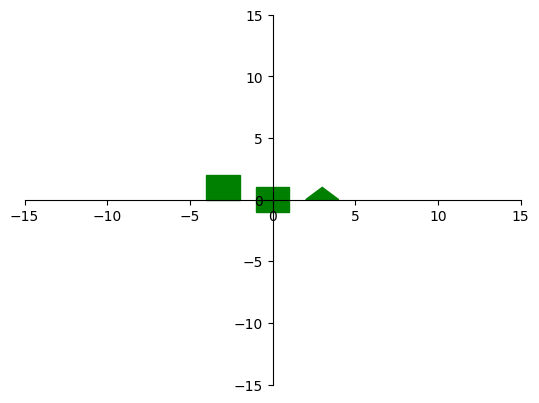

In [3]:
def draw_polygons(coordinates, x_limit: Tuple = (-15, 15), y_limit: Tuple = (-15, 15)): #координаты вершин(х, у), пределы для х и для у
    for figure in coordinates:
        x, y = zip(*figure)
        plt.fill(x, y, color='green') #заполняет фигуры с координатами зеленым цветом

    ax = plt.gca()
    #установка осей в нижнюю ось
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    #пределы осей
    plt.xlim(x_limit)
    plt.ylim(y_limit)


coord = iter((
    ((-4, 0), (-4, 2), (-2, 2), (-2, 0)),
    ((-1, -1), (-1, 1), (1, 1), (1, -1)),
    ((2, 0), (3, 1), (4, 0))
))

draw_polygons(coord, x_limit=(-15, 15), y_limit=(-15, 15))

### Задание 2
база

1.	прямоугольников ( gen_rectangle() );
2.	треугольников ( gen_triangle() );
3.	правильных шестиугольников ( gen_hexagon() ).
4.	с помощью данных функций используя функции из модуля itertools сгенерировать 7 фигур, включающих как прямоугольники, так и треугольники и шестиугольники, визуализировать результат.


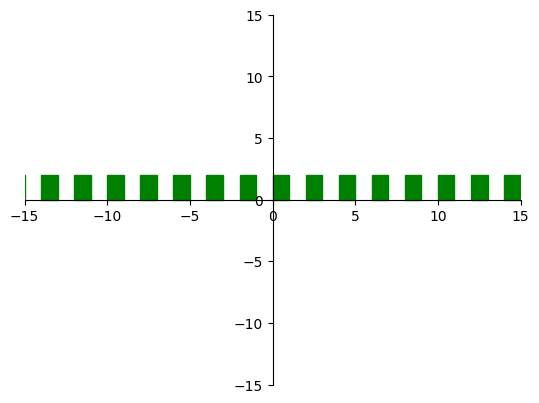

In [10]:
def gen_rectangle(length: int = 2, width: int = 2, start: int = -15, count: int = 100):
    x1 = it.islice(it.count(start=start, step=length), count) # генератор (создает прямоугольники с start до step) count раз
    x2 = it.islice(it.count(start=start - 1, step=length), count)
    y1 = it.islice(it.repeat(width), count) #повторяет координату у для верхней границы
    y2 = it.islice(it.repeat(0), count) #для нижней границы

    itr = []
    for _ in range(count):
        _x1, _x2, _y1, _y2 = next(x1), next(x2), next(y1), next(y2)
        itr.append(((_x1, _y1), (_x2, _y1), (_x2, _y2), (_x1, _y2)))

    draw_polygons(iter(itr))
    #return iter(itr)
gen_rectangle()

2

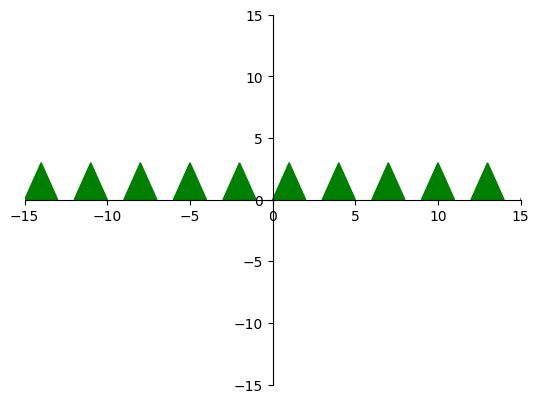

In [9]:
def gen_triangle(length: int = 3, height: int = 3, start: int = -15, count: int = 100):
    x1 = it.islice(it.count(start=start, step=length), count)
    x2 = it.islice(it.count(start=start + 1, step=length), count)
    x3 = it.islice(it.count(start=start + 2, step=length), count)
    y1 = it.islice(it.repeat(height), count)
    y2 = it.islice(it.repeat(0), count)

    itr = []
    for _ in range(count):
        _x1, _x2, _x3, _y1, _y2 = next(x1), next(x2), next(x3), next(y1), next(y2)
        itr.append(((_x1, _y2), (_x2, _y1), (_x3, _y2)))

    draw_polygons(iter(itr))
    #return iter(itr)
gen_triangle()

3

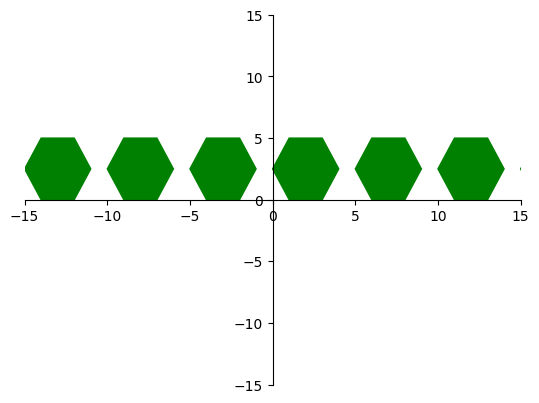

In [11]:
def gen_hexagon(length: int = 5, height: int = 5, start: int = -15, count: int = 100):
    x1 = it.islice(it.count(start=start, step=length), count)
    x2 = it.islice(it.count(start=start + 1, step=length), count)
    x3 = it.islice(it.count(start=start + 3, step=length), count)
    x4 = it.islice(it.count(start=start + 4, step=length), count)

    y1_ = it.islice(it.repeat(height), count)
    y2_ = it.islice(it.repeat(0), count)
    y3_ = iter([i / 2 for i in copy(y1_)])

    itr = []
    for _ in range(count):
        _x1, _x2, _x3, _x4 = next(x1), next(x2), next(x3), next(x4)
        _y1, _y2, _y3 = next(y1_), next(y2_), next(y3_)
        itr.append(((_x1, _y3), (_x2, _y1), (_x3, _y1), (_x4, _y3), (_x3, _y2), (_x2, _y2)))

    draw_polygons(iter(itr))
    #return iter(itr)
gen_hexagon()

4

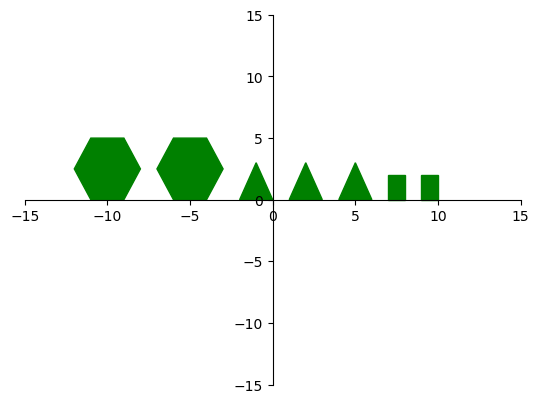

In [ ]:
draw_polygons(gen_rectangle(start=8, count=2))
draw_polygons(gen_triangle(start=-2, count=3))
draw_polygons(gen_hexagon(start=-12, count=2))

### Задание 3
база

1.	параллельный перенос ( tr_translate );

In [ ]:
def tr_translate(coordinates, move_up: int = 6, move_sideways: int = 0):
    fig = []
    for figure in coordinates: #достали координаты

        x, y = zip(figure) #создали х и у
        y = tuple(_y + move_up for _y in y) #сдвинули вверх
        x = tuple(_x + move_sideways for _x in x) #сдвинули вправо

        for x, y in zip(x, y):
            fig.append((x, y))

    return fig

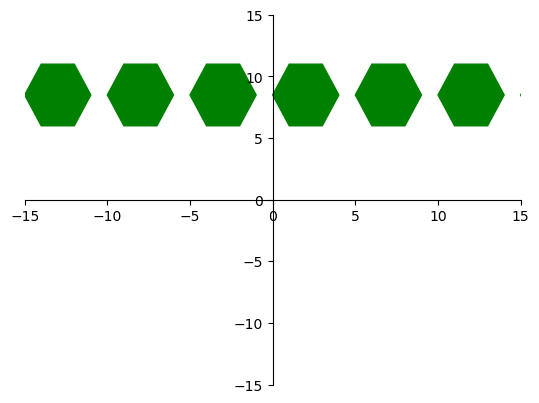

In [ ]:
draw_polygons(map(tr_translate, gen_hexagon()))

2.	поворот ( tr_rotate );

In [ ]:
def tr_rotate(coordinates, angle: int = 30) :
    def rotate_point(point, angle):
        x, y = point
        cos = m.cos(angle)
        sin = m.sin(angle)
        new_x = x * cos - y * sin
        new_y = x * sin + y * cos
        return new_x, new_y

    radians = m.radians(angle) #в радинаны

    return [rotate_point(point, radians) for point in coordinates]

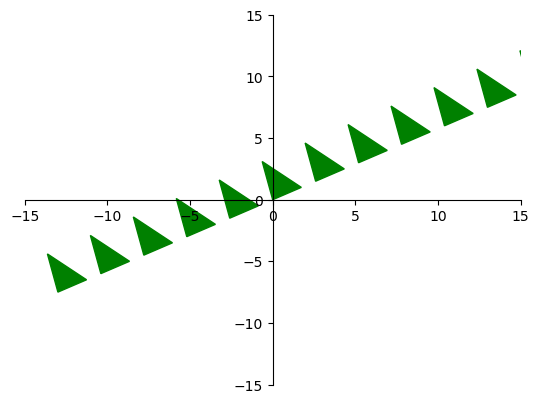

In [ ]:
draw_polygons(map(tr_rotate, gen_triangle()))

3.	симметрия ( tr_symmetry );

In [ ]:
def tr_symmetry(coordinates):
    itr = map(ft.partial(tr_translate, move_up=-7.5, move_sideways=1), [coordinates]) #сдвиг
    result = [i for i in map(ft.partial(tr_rotate, angle=180), itr)][0] #поворот
    return result

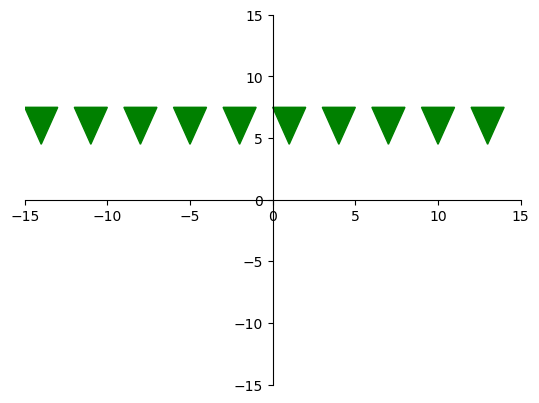

In [ ]:
draw_polygons(map(tr_symmetry, gen_triangle()))

4.	гомотетия ( tr_homothety );

In [ ]:
def tr_homothety(coordinates, k=2.5):
    fig = []
    for figure in coordinates:
        x, y = zip(figure)

        x_ = tuple(_x * k for _x in x)
        y_ = tuple(_y * k for _y in y)
        for x, y in zip(x_, y_):
            fig.append(tuple((x, y)))

    return fig

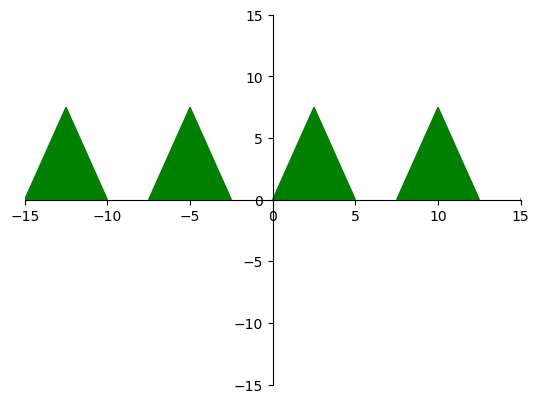

In [ ]:
draw_polygons(map(tr_homothety, gen_triangle()))

### Задание 4
база

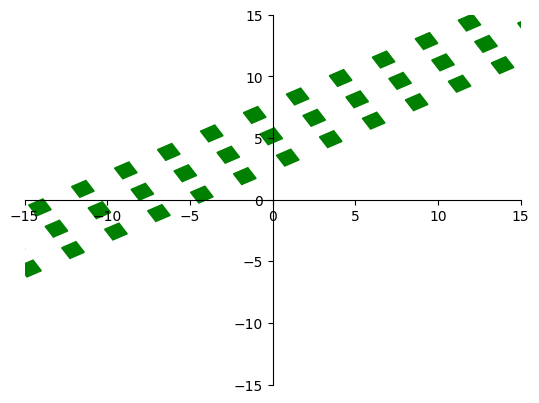

In [ ]:
draw_polygons(map(tr_rotate, map(tr_translate, gen_rectangle(length=3, width=1))))
draw_polygons(map(tr_rotate, map(ft.partial(tr_translate, move_up=2), gen_rectangle(length=3, width=1))))
draw_polygons(map(tr_rotate, map(ft.partial(tr_translate, move_up=4), gen_rectangle(length=3, width=1))))

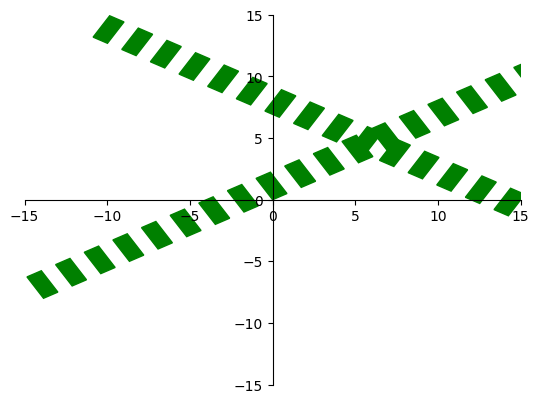

In [ ]:
draw_polygons(map(tr_rotate, gen_rectangle()))
draw_polygons(map(ft.partial(tr_rotate, angle=-30), map(tr_translate, gen_rectangle())))

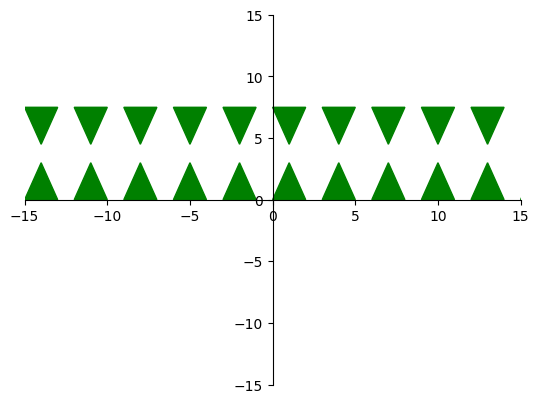

In [ ]:
draw_polygons(gen_triangle())
draw_polygons(map(tr_symmetry, gen_triangle()))

In [ ]:
def draw_homothety(coordinates, n):
    if n == 0: return
    coord = list(coordinates)
    draw_polygons(coord)
    coord = map(tr_homothety, coord)
    draw_homothety(coord, n - 1)

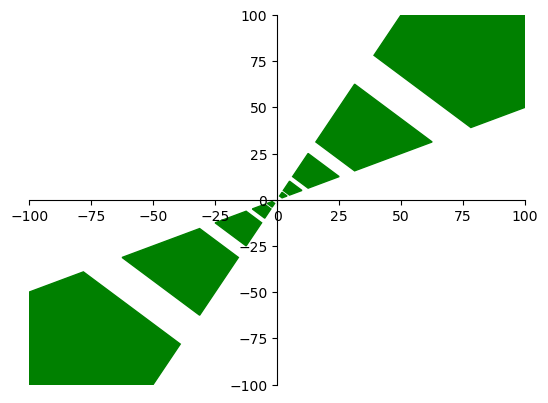

In [ ]:
coord = iter((
    ((1, 2), (2, 4), (4, 2), (2, 1)),
    ((-1, -2), (-2, -4), (-4, -2), (-2, -1))
))

draw_homothety(coord, 5)

plt.xlim(-100, 100)
plt.ylim(-100, 100);

### Задание 5


1.	фильтрации фигур, являющихся выпуклыми многоугольниками ( flt_convex_polygon );

In [ ]:
def flt_convex_polygon(coordinates):
    points = [Point(*c) for c in coordinates]
    polygon = Polygon(points) #create polygon of points
    if polygon == polygon.convex_hull:#проверка не выпуклость
        return True
    return False

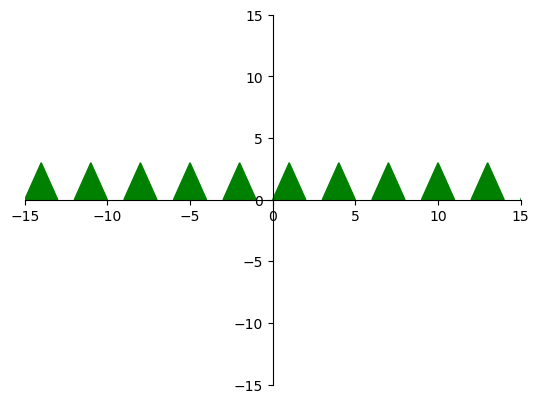

In [ ]:
draw_polygons(filter(flt_convex_polygon, gen_triangle()))

2.	фильтрации фигур, имеющих хотя бы один угол, совпадающий с заданной точкой

In [ ]:
def flt_angle_point(coordinates, angle: Tuple = (0, 0)):
    for point in coordinates:
        if point == angle:
            return False
    return True

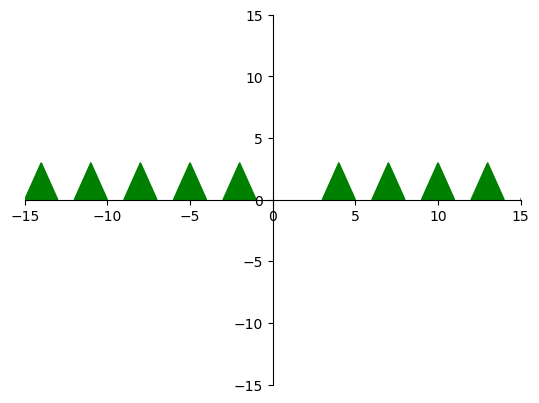

In [ ]:
draw_polygons(filter(flt_angle_point, gen_triangle()))

3.	фильтрации фигур, имеющих площадь менее заданной

In [ ]:
def flt_square(coordinates, area: int = 2):
    return True if Polygon(coordinates).area > area else False

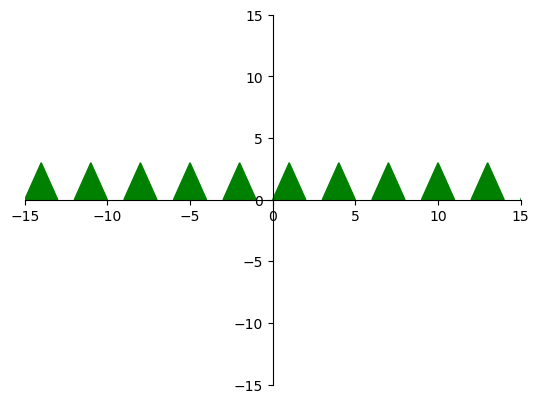

In [ ]:
draw_polygons(filter(flt_square, gen_triangle()))

4.	фильтрации фигур, имеющих кратчайшую сторону менее заданного значения ( flt_short_side );

In [ ]:
def flt_short_side(coordinates, side=1, reverse: bool = False):
    shortest_side = None
    for first_point in coordinates:
        x1, y1 = first_point
        for second_point2 in coordinates:
            x2, y2 = second_point2
            if (x1, y1) == (x2, y2): continue
            side_ = (((x1 - x2) ** 2) + ((y1 - y2) ** 2)) ** 0.5
            if shortest_side == None:
                shortest_side = side_
            if side_ < shortest_side:
                shortest_side = side_
    if shortest_side < side:
        return reverse
    return not reverse

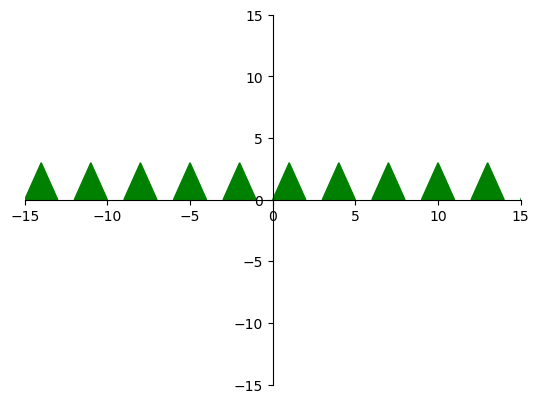

In [ ]:
draw_polygons(filter(flt_short_side, gen_triangle()))

5.	фильтрации выпуклых многоугольников, включающих заданную точку (внутри многоугольника) ( flt_point_inside );

In [ ]:
def flt_point_inside(coordinates, point: Tuple = (0, 0)):
    if flt_convex_polygon(coordinates):
        x, y = zip(*coordinates)
        x_max, x_min = max(x), min(x)
        y_max, y_min = max(y), min(y)
        return x_min <= point[0] <= x_max and y_min <= point[1] <= y_max
    return False

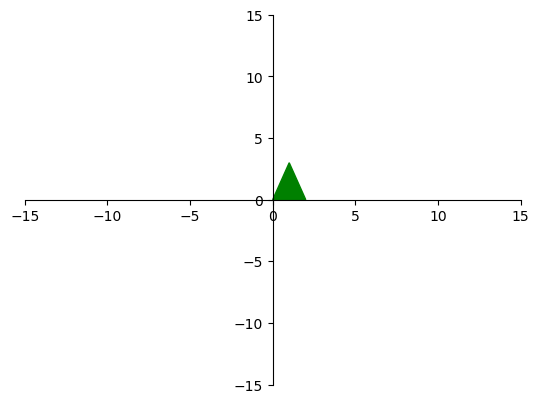

In [ ]:
draw_polygons(filter(flt_point_inside, gen_triangle()))

6.	фильтрации выпуклых многоугольников, включающих любой из углов заданного многоугольника ( flt_polygon_angles_inside );

In [ ]:
def flt_polygon_angles_inside(coordinates: Tuple[Tuple],
                              polygon: Tuple[Tuple] = ((-10, 0), (0, 1), (1, 1), (5, 0))):
    if flt_convex_polygon(coordinates):
        x, y = zip(*coordinates)
        x_max, x_min = max(x), min(x)
        y_max, y_min = max(y), min(y)
        for point in polygon:
            if x_min <= point[0] <= x_max and y_min <= point[1] <= y_max:
                return False
        return True
    return False

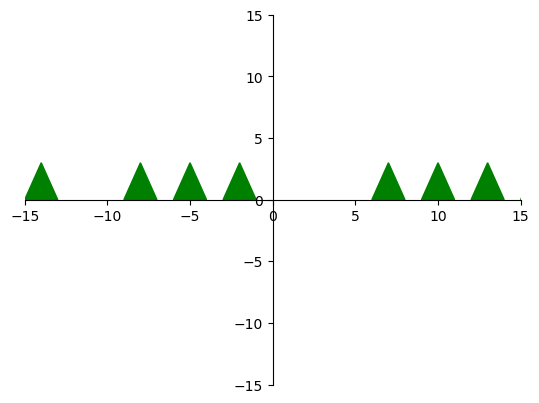

In [ ]:
draw_polygons(filter(flt_polygon_angles_inside, gen_triangle()))

### Задание 6
1 пункт - база

3 пункта - сложность 1

* используя функции генерации из п. 2 и операции из п. 3, создать не менее 15 фигур, которые имеют различный масштаб, и выбрать из них (подбором параметра фильтрации) не более четырех фигур, имеющих кратчайшую сторону меньше заданного значения;


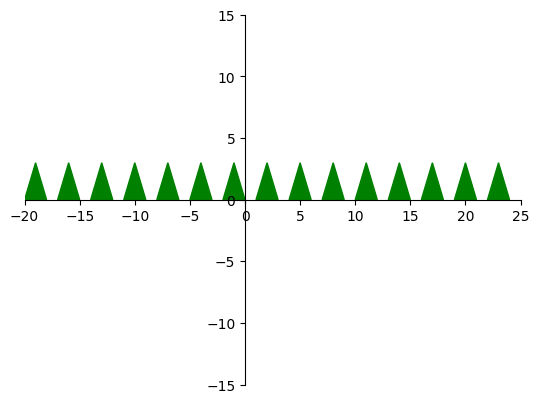

In [ ]:
draw_polygons(gen_triangle(start=-20, count=15), x_limit=(-20, 25), y_limit=(-15, 15))

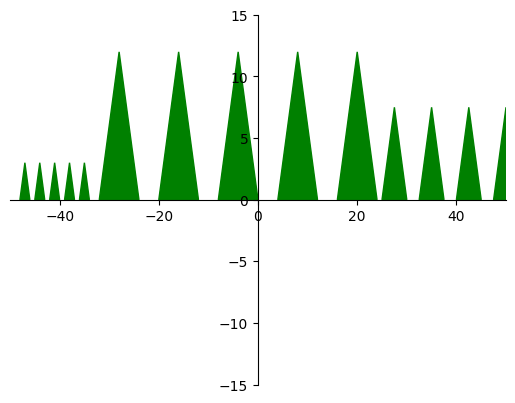

In [ ]:
draw_polygons(map(tr_homothety, gen_triangle(start=10, count=5)))
draw_polygons(gen_triangle(start=-48, count=5))
draw_polygons(map(ft.partial(tr_homothety, k=4), gen_triangle(start=-8, count=5)), x_limit=(-50, 50), y_limit=(-15, 15))

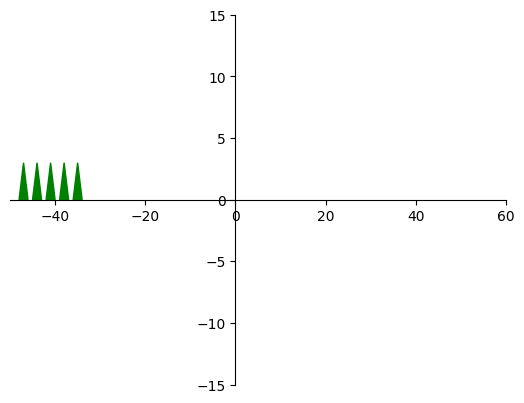

In [ ]:
lst = [map(tr_homothety, gen_triangle(start=10, count=5)), gen_triangle(start=-48, count=5),
       map(ft.partial(tr_homothety, k=4), gen_triangle(start=-8, count=5))]
for itr_1 in lst:
    draw_polygons(filter(ft.partial(flt_short_side, side=5, reverse=True), itr_1), x_limit=(-50, 60), y_limit=(-15, 15))

### Задание 7
база - 1 пункт

5 декораторов - 1 сложность


1.	Фильтрующие многоугольники в итераторах среди аргументов функции, работающие на основе функций из 5: @flt_convex_polygon, @flt_angle_point, @flt_square, @flt_short_side, @flt_point_inside, @flt_polygon_angles_inside ;

In [ ]:
def tr_translate(move_up: int = 6, move_sideways: int = 0):
    def decorator(func):
        def wrapper(*args, **kwargs):
            coordinates = func(*args, **kwargs)
            translated_coordinates = []
            for figure in coordinates:
                translated_figure = []
                for x, y in figure:
                    translated_x = x + move_sideways
                    translated_y = y + move_up
                    translated_figure.append((translated_x, translated_y))
                translated_coordinates.append(tuple(translated_figure))
            return translated_coordinates
        return wrapper
    return decorator

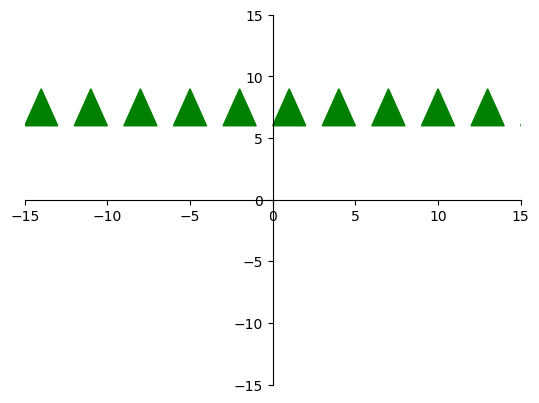

In [ ]:
@tr_translate(move_up=6, move_sideways=0)
def gen_triangle(length: int = 3, height: int = 3, start: int = -15, count: int = 100):
    x1 = it.islice(it.count(start=start, step=length), count)
    x2 = it.islice(it.count(start=start + 1, step=length), count)
    x3 = it.islice(it.count(start=start + 2, step=length), count)
    y1 = it.islice(it.repeat(height), count)
    y2 = it.islice(it.repeat(0), count)

    itr = []
    for _ in range(count):
        _x1, _x2, _x3, _y1, _y2 = next(x1), next(x2), next(x3), next(y1), next(y2)
        itr.append(((_x1, _y2), (_x2, _y1), (_x3, _y2)))

    return iter(itr)


draw_polygons(gen_triangle())

In [ ]:
def tr_rotate(angle: int = 30):
    def decorator(func):
        def wrapper(*args, **kwargs):
            coordinates = func(*args, **kwargs)

            def rotate_point(point, angle):
                x, y = point
                cos = m.cos(angle)
                sin = m.sin(angle)
                new_x = x * cos - y * sin
                new_y = x * sin + y * cos
                return new_x, new_y

            radians = m.radians(angle)
            fig = []
            for figure in coordinates:
                fig.append([rotate_point(point, radians) for point in figure])
            return fig

        return wrapper

    return decorator

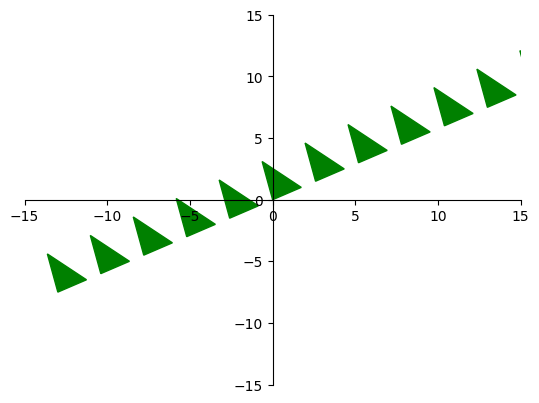

In [ ]:
@tr_rotate()
def gen_triangle(length: int = 3, height: int = 3, start: int = -15, count: int = 100):
    x1 = it.islice(it.count(start=start, step=length), count)
    x2 = it.islice(it.count(start=start + 1, step=length), count)
    x3 = it.islice(it.count(start=start + 2, step=length), count)
    y1 = it.islice(it.repeat(height), count)
    y2 = it.islice(it.repeat(0), count)

    itr = []
    for _ in range(count):
        _x1, _x2, _x3, _y1, _y2 = next(x1), next(x2), next(x3), next(y1), next(y2)
        itr.append(((_x1, _y2), (_x2, _y1), (_x3, _y2)))

    return iter(itr)


draw_polygons(gen_triangle())

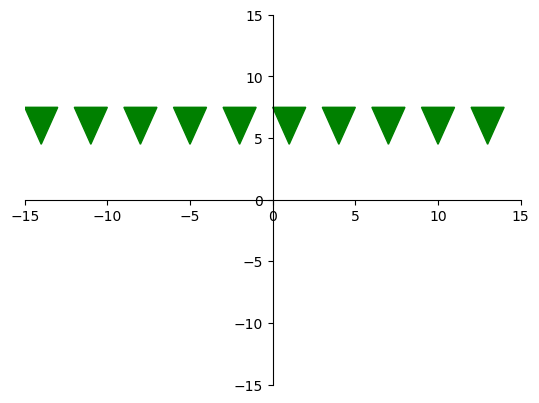

In [ ]:
def tr_translate(coordinates: Iterable[Tuple], move_up: int = 6, move_sideways: int = 0):
    fig = []
    for figure in coordinates:

        x, y = zip(figure)
        y = tuple(_y + move_up for _y in y)
        x = tuple(_x + move_sideways for _x in x)

        for x, y in zip(x, y):
            fig.append((x, y))

    return fig


def tr_rotate(coordinates: Iterable[Tuple], angle: int = 30) -> Iterable[Tuple]:
    def rotate_point(point, angle):
        x, y = point
        cos = m.cos(angle)
        sin = m.sin(angle)
        new_x = x * cos - y * sin
        new_y = x * sin + y * cos
        return new_x, new_y

    radians = m.radians(angle)

    return [rotate_point(point, radians) for point in coordinates]


def tr_simmetry(func):
    def wrapper():
        coordinates = func()
        itr = map(ft.partial(tr_translate, move_up=-7.5, move_sideways=1), coordinates)
        result = [i for i in map(ft.partial(tr_rotate, angle=180), itr)]
        return result

    return wrapper


@tr_simmetry
def gen_triangle(length: int = 3, height: int = 3, start: int = -15, count: int = 100):
    x1 = it.islice(it.count(start=start, step=length), count)
    x2 = it.islice(it.count(start=start + 1, step=length), count)
    x3 = it.islice(it.count(start=start + 2, step=length), count)
    y1 = it.islice(it.repeat(height), count)
    y2 = it.islice(it.repeat(0), count)

    itr = []
    for _ in range(count):
        _x1, _x2, _x3, _y1, _y2 = next(x1), next(x2), next(x3), next(y1), next(y2)
        itr.append(((_x1, _y2), (_x2, _y1), (_x3, _y2)))

    return iter(itr)


draw_polygons(gen_triangle())

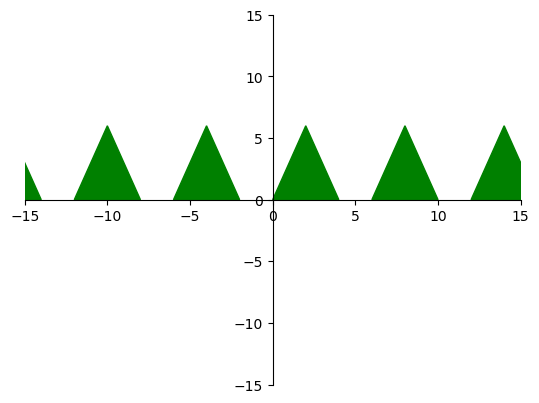

In [ ]:
def tr_homothety(k):
    def decorator(func):
        def wrapper(*args, **kwargs):
            coordinates = func(*args, **kwargs)
            coord = []
            for figure in coordinates:
                polygon = []
                for fig in figure:
                    x, y = zip(fig)
                    x_ = tuple(_x * k for _x in x)
                    y_ = tuple(_y * k for _y in y)
                    for x, y in zip(x_, y_):
                        polygon.append(tuple((x, y)))
                coord.append(tuple(polygon))
            return coord

        return wrapper

    return decorator


@tr_homothety(2)
def gen_triangle(length: int = 3, height: int = 3, start: int = -15, count: int = 100):
    x1 = it.islice(it.count(start=start, step=length), count)
    x2 = it.islice(it.count(start=start + 1, step=length), count)
    x3 = it.islice(it.count(start=start + 2, step=length), count)
    y1 = it.islice(it.repeat(height), count)
    y2 = it.islice(it.repeat(0), count)

    itr = []
    for _ in range(count):
        _x1, _x2, _x3, _y1, _y2 = next(x1), next(x2), next(x3), next(y1), next(y2)
        itr.append(((_x1, _y2), (_x2, _y1), (_x3, _y2)))

    return iter(itr)


draw_polygons(gen_triangle())

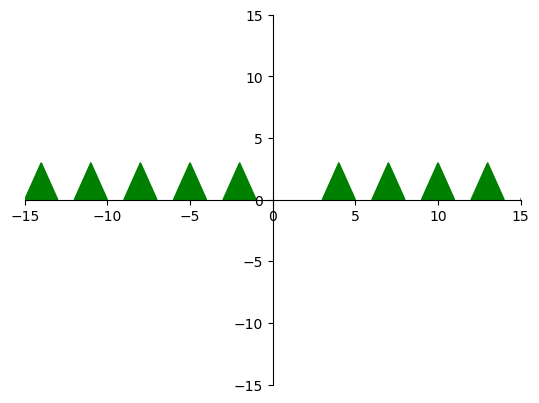

In [ ]:
def flt_point_inside(point):
    def decorator(func):
        def wrapper(*args, **kwargs):
            coordinates = func(*args, **kwargs)
            coord = []
            for figure in coordinates:
                if flt_convex_polygon(figure):
                    x, y = zip(*figure)
                    x_max, x_min = max(x), min(x)
                    y_max, y_min = max(y), min(y)
                    if not (x_min <= point[0] <= x_max and y_min <= point[1] <= y_max):
                        coord.append(figure)
            return coord

        return wrapper

    return decorator


@flt_point_inside(point=(0, 0))
def gen_triangle(length: int = 3, height: int = 3, start: int = -15, count: int = 100):
    x1 = it.islice(it.count(start=start, step=length), count)
    x2 = it.islice(it.count(start=start + 1, step=length), count)
    x3 = it.islice(it.count(start=start + 2, step=length), count)
    y1 = it.islice(it.repeat(height), count)
    y2 = it.islice(it.repeat(0), count)

    itr = []
    for _ in range(count):
        _x1, _x2, _x3, _y1, _y2 = next(x1), next(x2), next(x3), next(y1), next(y2)
        itr.append(((_x1, _y2), (_x2, _y1), (_x3, _y2)))

    return iter(itr)


draw_polygons(gen_triangle())

8.	Реализовать функции и продемонстрировать их корректность:

5.	расчет суммарной площади ( agr_area )


In [ ]:
def agr_area(all_area: Union[float, int], coordinates: Iterable[Tuple]):
    return all_area + Polygon(coordinates).area


coord = iter((
    ((-4, 0), (-4, 2), (-2, 2), (-2, 0)),
    ((-1, -1), (-1, 1), (1, 1), (1, -1)),
    ((2, 0), (3, 1), (4, 0))
))
print(ft.reduce(agr_area, coord, 0))

9.0


4.	расчет суммарного периметра ( agr_perimeter );

In [ ]:
def arg_perimeter(all_perimiter, coordinates: Iterable[Tuple]):
    coordinates = list(coordinates)
    coordinates[len(coordinates) - 1] = coordinates[0]
    perimeter = 0
    for side in range(len(coordinates) - 1):
        x1, y1 = coordinates[side]
        x2, y2 = coordinates[side + 1]
        perimeter += (((x2 - x1) ** 2) - (y2 - y2) ** 2) ** 0.5
    return all_perimiter + perimeter


coord = iter((
    ((-4, 0), (-4, 2), (-2, 2), (-2, 0)),
    ((-1, -1), (-1, 1), (1, 1), (1, -1)),
    ((2, 0), (3, 1), (4, 0))
))
print(ft.reduce(arg_perimeter, coord, 0))

10.0


3.	поиск самой маленькой площади многоугольника ( agr_min_area );

In [ ]:
def arg_min_area(min_area, coordinates: Iterable[Tuple]):
    if min_area == 0:
        return Polygon(coordinates).area
    elif min_area > Polygon(coordinates).area:
        min_area = Polygon(coordinates).area
    return min_area


coord = iter((
    ((-4, 0), (-4, 2), (-2, 2), (-2, 0)),
    ((-1, -1), (-1, 1), (1, 1), (1, -1)),
    ((2, 0), (3, 1), (4, 0))
))
print(ft.reduce(arg_min_area, coord, 0))

1.0


2.	поиск самого длинной стороны многоугольника ( agr_max_side );

In [ ]:
def arg_max_side(max_side, coordinates: Iterable[Tuple]):
    coordinates = list(coordinates)
    coordinates[len(coordinates) - 1] = coordinates[0]
    for side in range(len(coordinates) - 1):
        x1, y1 = coordinates[side]
        x2, y2 = coordinates[side + 1]
        side = (((x2 - x1) ** 2) - (y2 - y2) ** 2) ** 0.5
        if side > max_side:
            max_side = side
    return max_side


coord = iter((
    ((-4, 0), (-4, 2), (-2, 2), (-2, 0)),
    ((-1, -1), (-1, 1), (1, 1), (1, -1)),
    ((2, 0), (3, 1), (4, 0))
))
print(ft.reduce(arg_max_side, coord, 0))

2.0


1.	поиск угла, самого близкого к началу координат ( agr_origin_nearest );

In [ ]:
def arg_origin_nearest(angle_coordinates: Union[Tuple, None], coordinates: Iterable[Tuple]):
    if angle_coordinates == None:
        angle_coordinates = coordinates[0]
    for side in coordinates:
        if angle_coordinates[0] > abs(side[0]) and angle_coordinates[1] > abs(side[1]):
            angle_coordinates = abs(side[0]), abs(side[1])
    return angle_coordinates


coord = iter((
    ((-4, 0), (-4, 2), (-2, 2), (-2, 0)),
    ((-1, -1), (-1, 1), (1, 1), (1, -1)),
    ((2, 0), (3, 1), (4, 0))
))
print(ft.reduce(arg_origin_nearest, coord, None))

(-4, 0)
